## Setup

## API Anahtarlarını Yapılandırma

YOLO11'i ince ayar yapmak için Roboflow API anahtarınızı sağlamanız gerekir. Şu adımları izleyin:

* **Roboflow Ayarları** sayfanıza ([https://app.roboflow.com/settings/api](https://app.roboflow.com/settings/api)) gidin. **Kopyala**'ya tıklayın. Bu, özel anahtarınızı panoya kopyalayacaktır.
* Colab'de sol bölmeye gidin ve 🔑 ikonuna tıklayın. Roboflow API Anahtarını **`ROBOFLOW_API_KEY`** adıyla saklayın.

---
## Başlamadan Önce

GPU erişimimiz olduğundan emin olalım. Bunun için `nvidia-smi` komutunu kullanabiliriz. Herhangi bir sorunla karşılaşırsanız **Düzenle** -> **Not Defteri ayarları** -> **Donanım hızlandırıcı** yolunu izleyerek ayarı **GPU** olarak belirleyin ve ardından **Kaydet**'e tıklayın.

In [ ]:
!nvidia-smi

Thu May 22 17:29:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

---
## Not:
Veri kümeleri, görseller ve modelleri daha kolay yönetmek için bir **`HOME`** sabiti oluşturacağız.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Ultralytics'i indirelim

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


## Verileri roboflowdan çekelim

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("liangdianzhong")
project = rf.workspace("traffic-sign-project-qkdyy").project("traffic-signs-detection-europe-rps2t")
version = project.version(2)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Signs-Detection-Europe-2 in yolov11:: 100%|██████████| 20862/20862 [00:04<00:00, 5175.72it/s]


## Modelin Eğitilmesi

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml imgsz=640 batch=96 epochs=30 patience=20 workers=2 plots=True cache=True

/content
100% 5.35M/5.35M [00:00<00:00, 247MB/s]
New https://pypi.org/project/ultralytics/8.3.142 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/Traffic-Signs-Detection-Europe-2/data.yaml, epochs=30, time=None, patience=20, batch=96, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic

---
## Not:
Tamamlanan eğitimin sonuçları **`{HOME}/runs/detect/train/`** dizinine kaydedilir. Şimdi bunları inceleyelim.

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1900.jpg
confusion_matrix_normalized.png			    train_batch1901.jpg
confusion_matrix.png				    train_batch1902.jpg
events.out.tfevents.1747940923.a68575e70428.1061.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


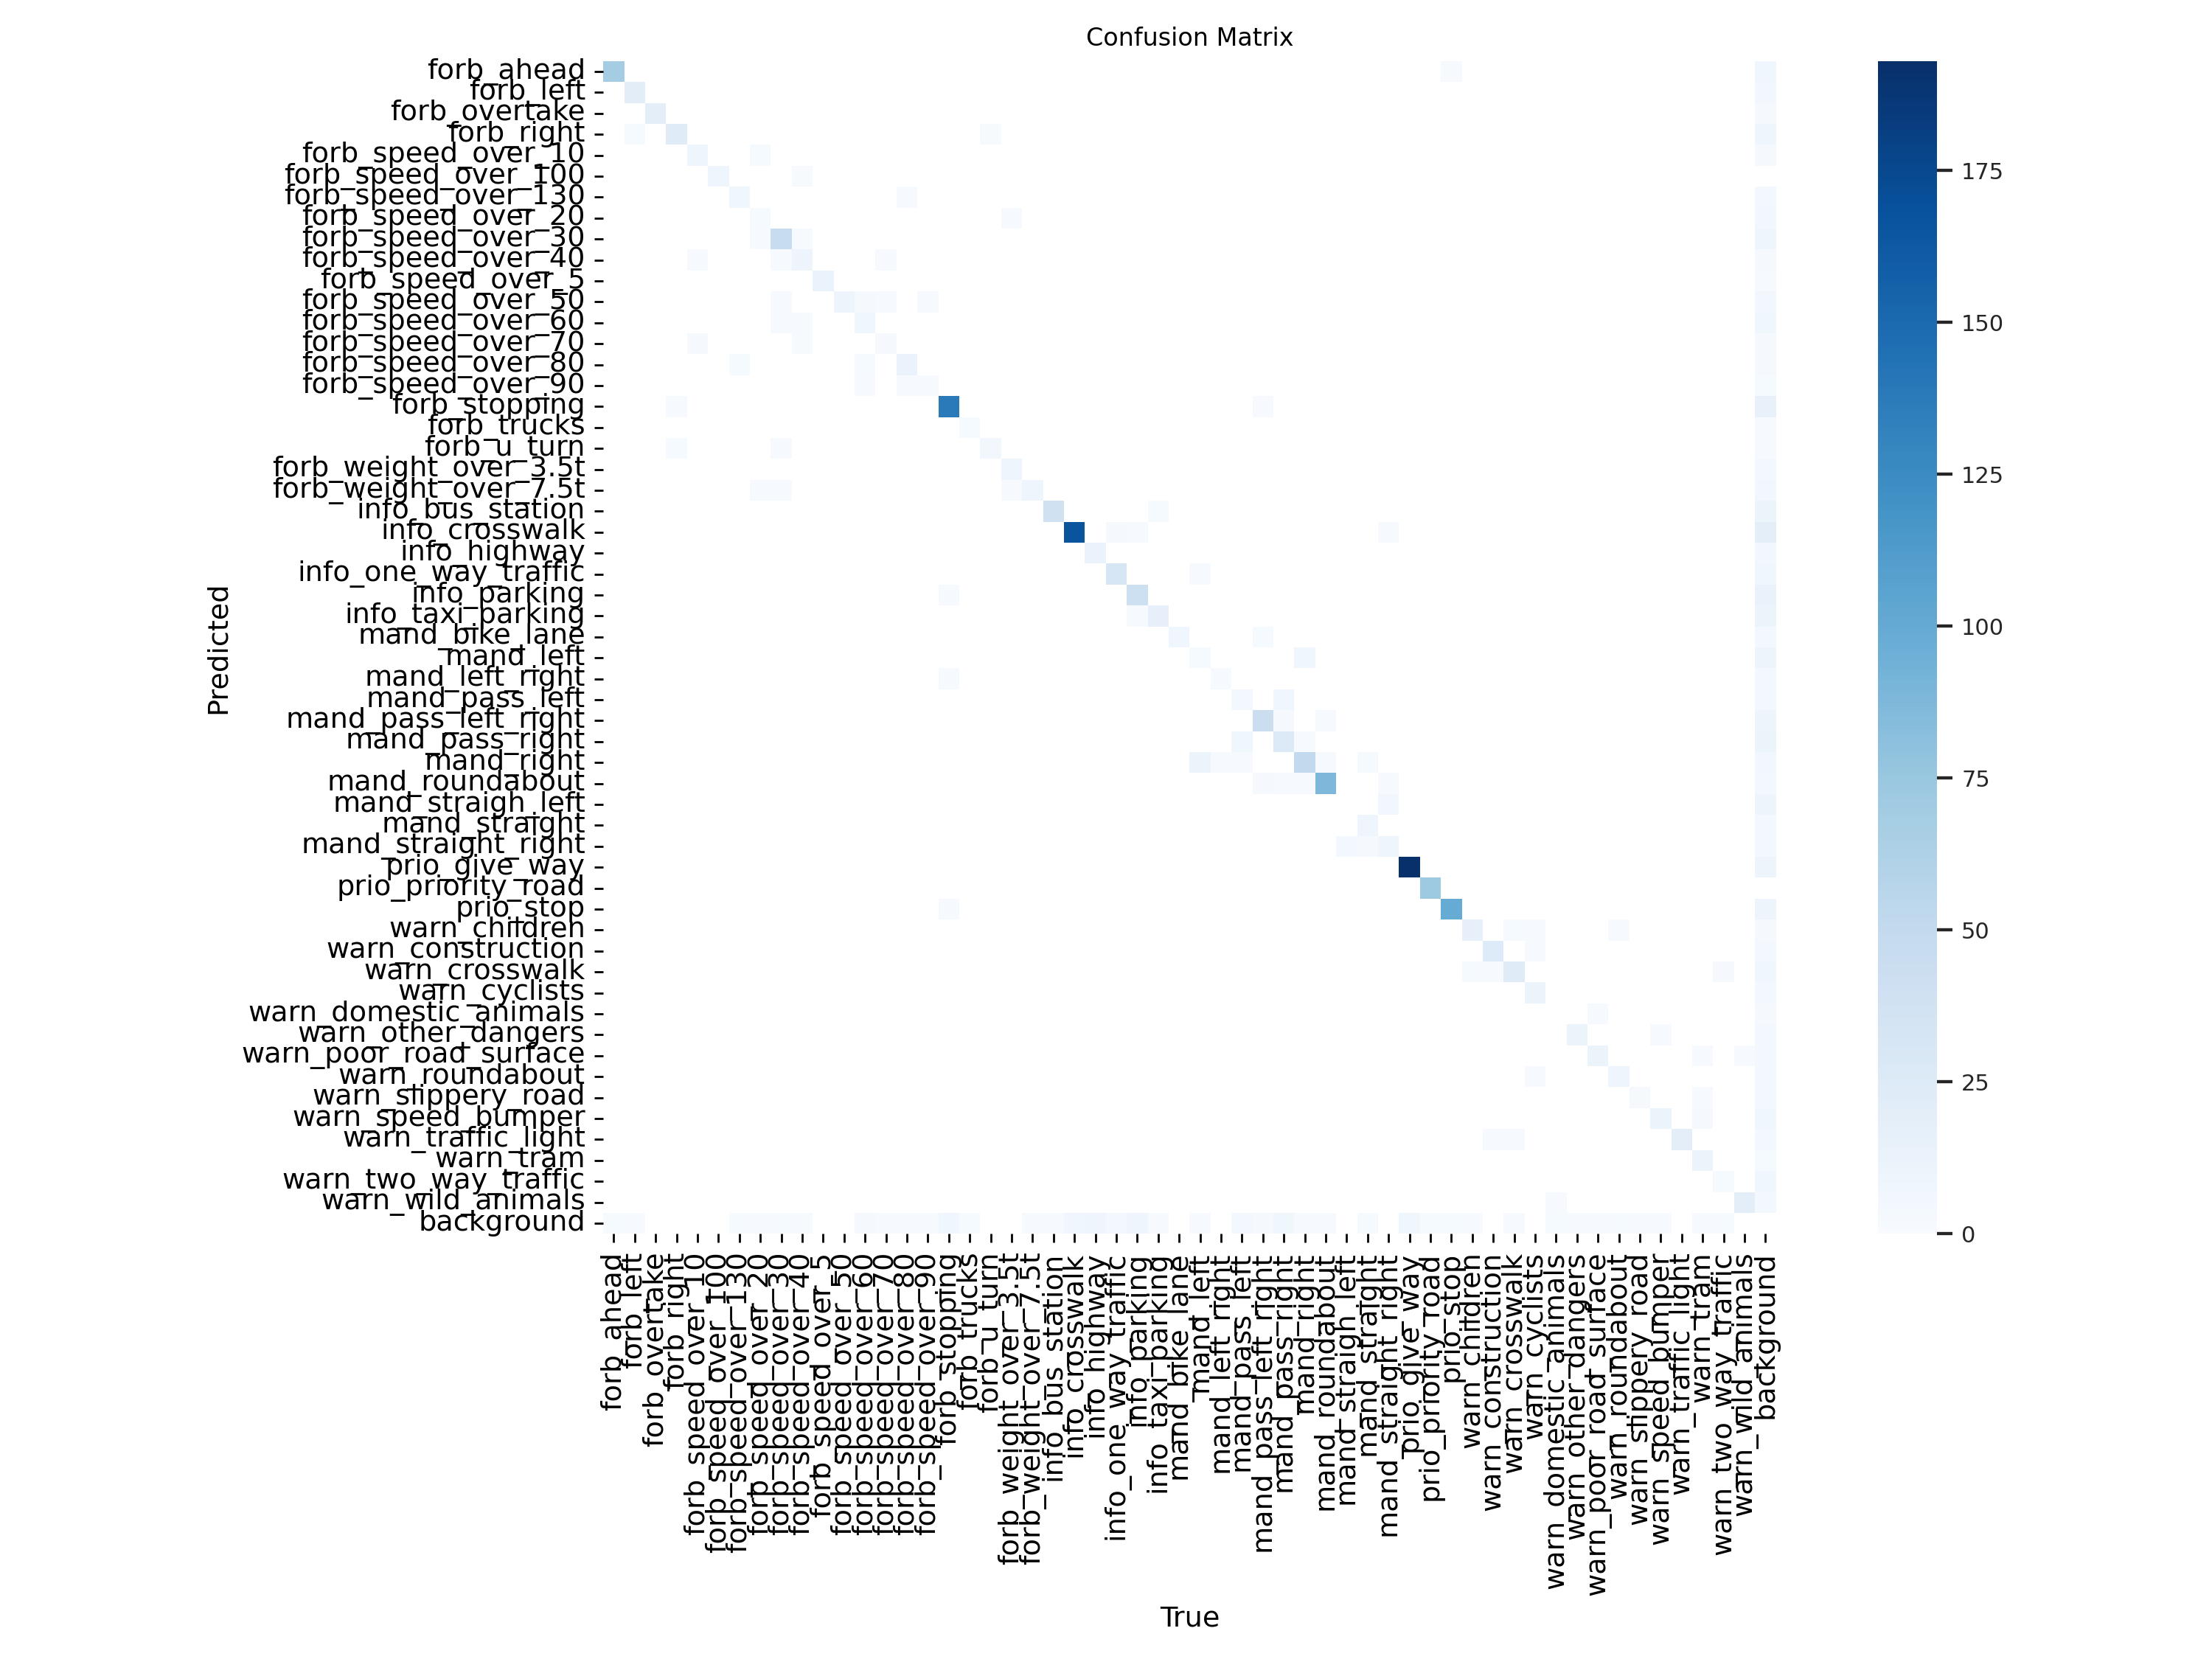

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

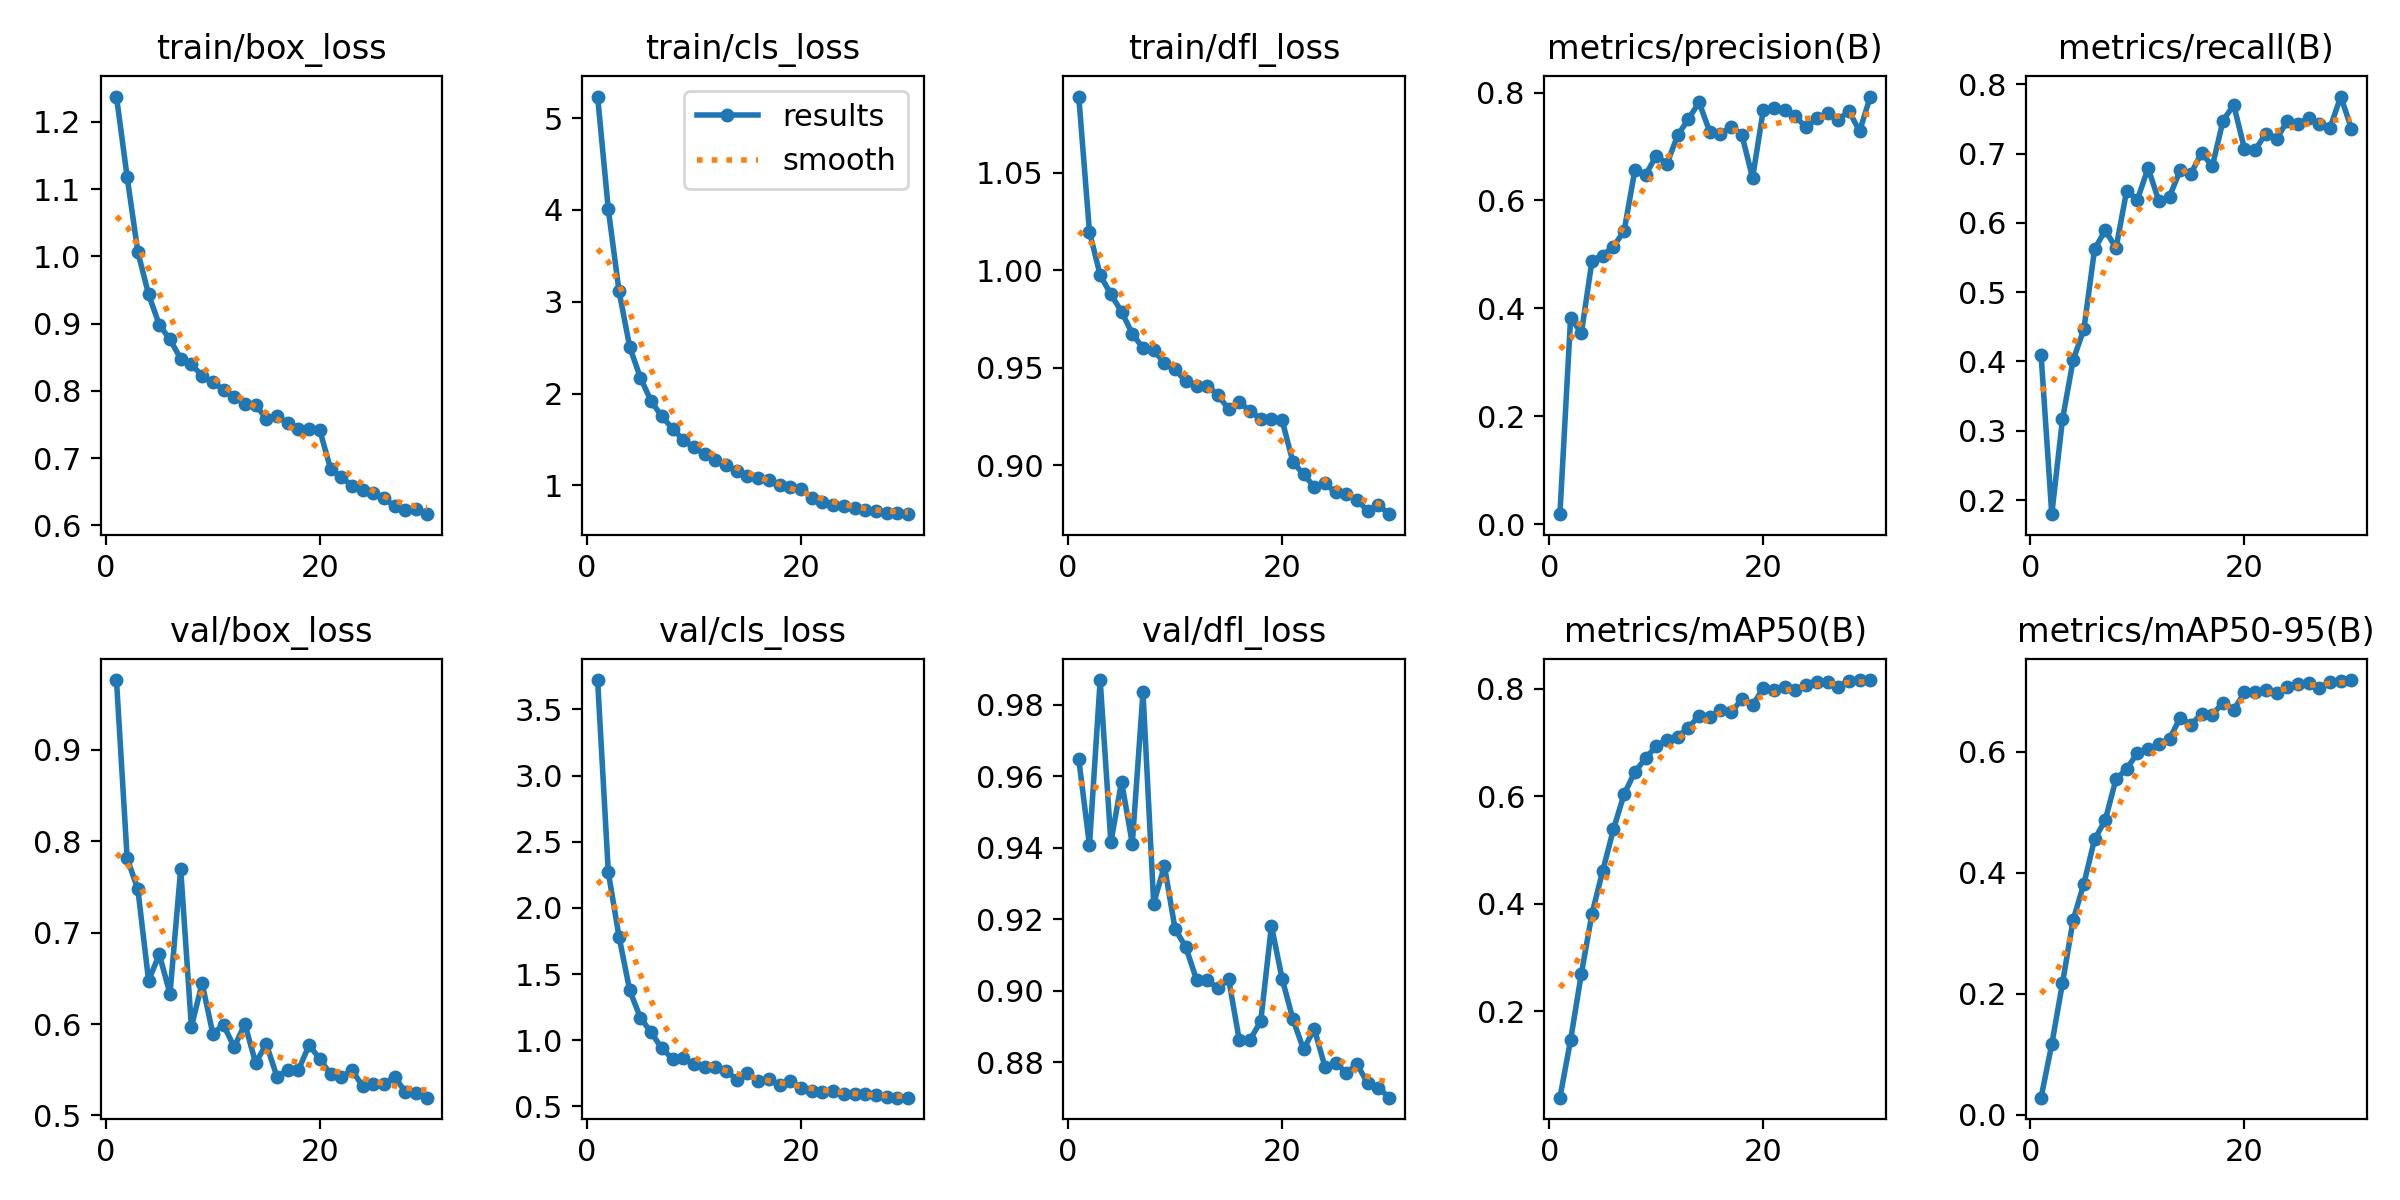

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

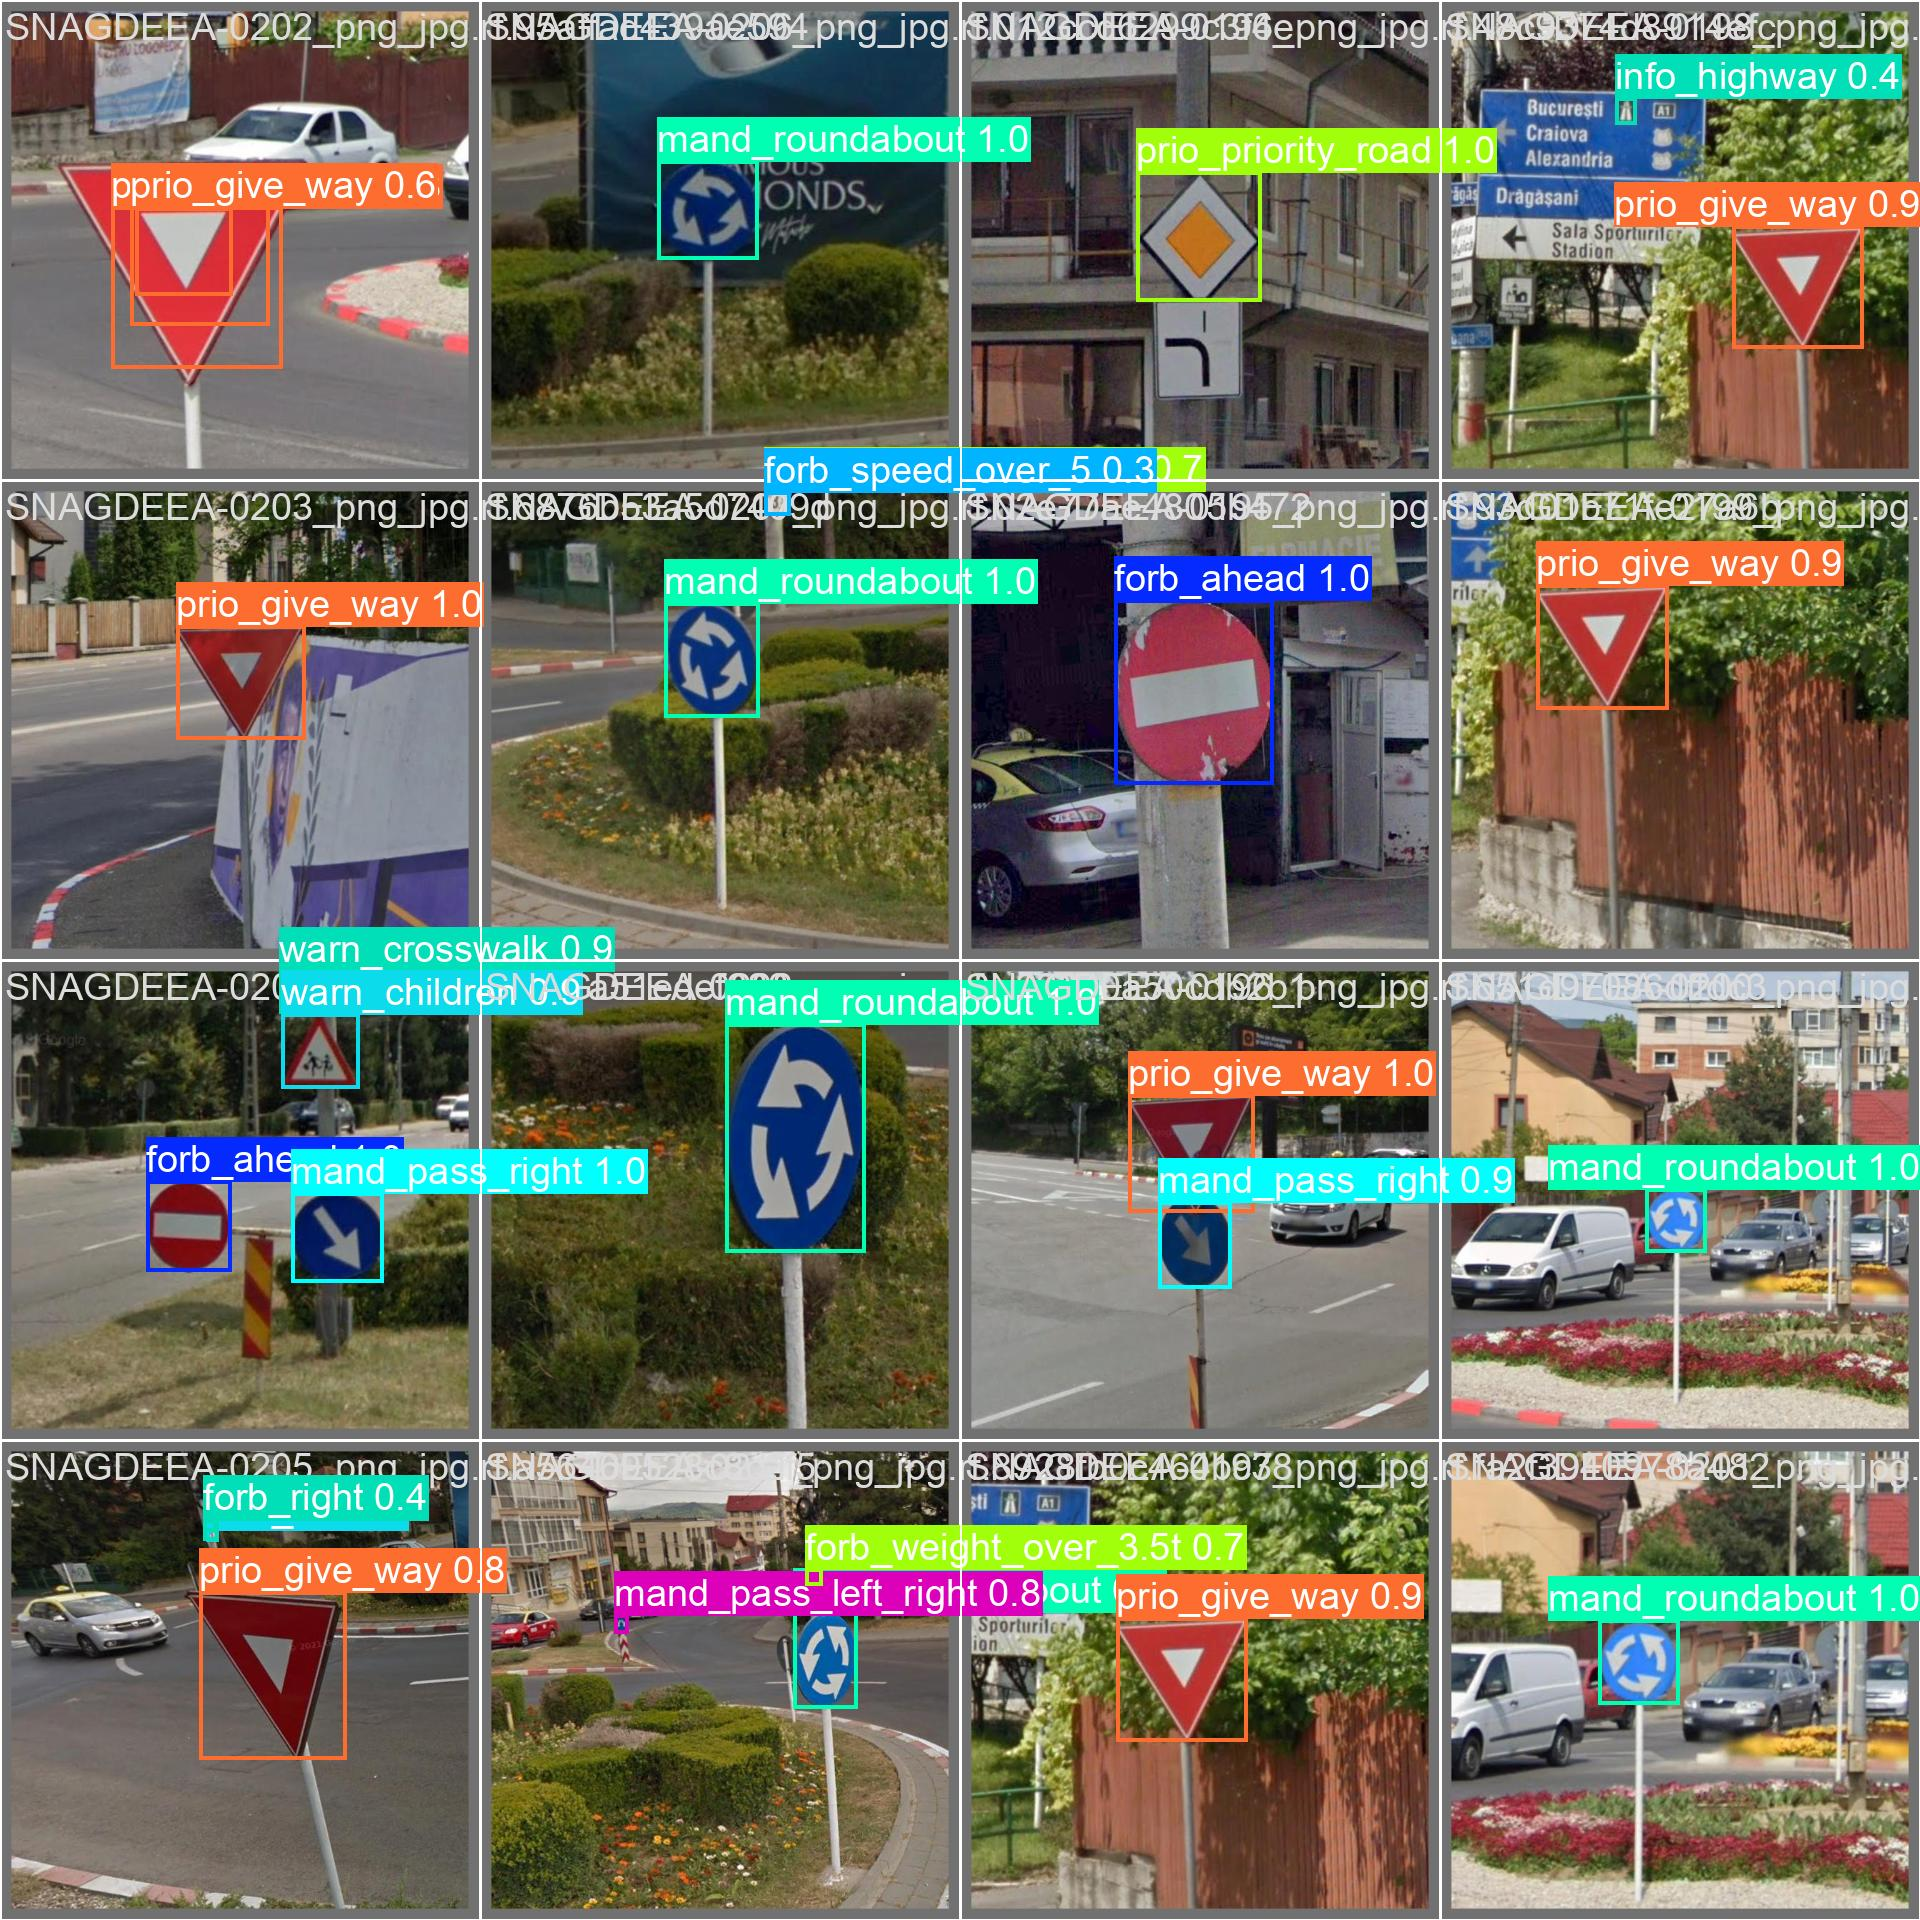

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Modeli valide edelim

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,592,877 parameters, 0 gradients, 6.4 GFLOPs
val: Scanning /content/datasets/Traffic-Signs-Detection-Europe-2/valid/labels.cache... 985 images, 41 backgrounds, 0 corrupt: 100% 985/985 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 62/62 [00:11<00:00,  5.44it/s]
                   all        985       1757      0.793      0.736      0.816      0.718
            forb_ahead         70         71      0.911      0.958      0.987      0.903
             forb_left         24         24      0.865      0.917      0.946      0.839
         forb_overtake         18         19      0.935          1       0.99      0.865
            forb_right         26         26      0.865      0.885      0.903      0.825
    forb_speed_over_10         12         13      0.906      0.615      0.872      0.768
   forb_speed_over_

## Modelle inference yapalım

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

## Bazı sonuçlara bakalım...

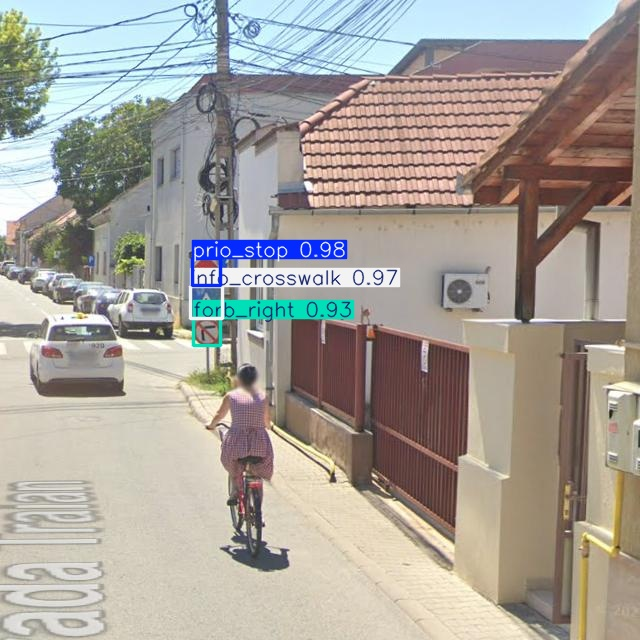

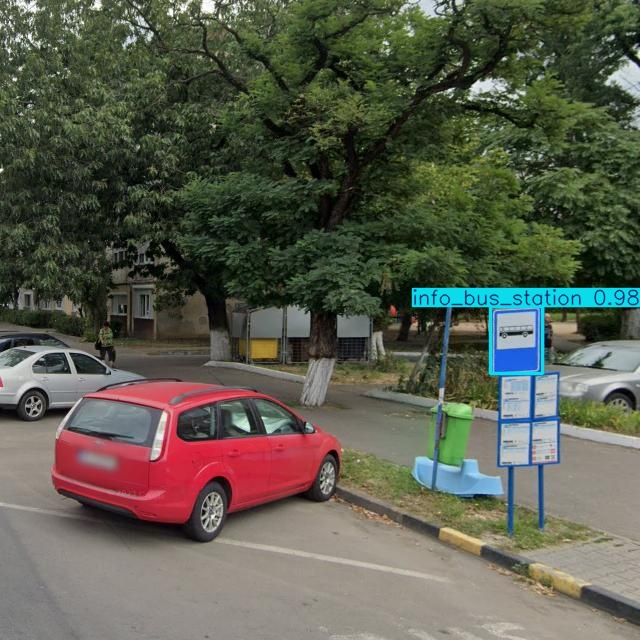

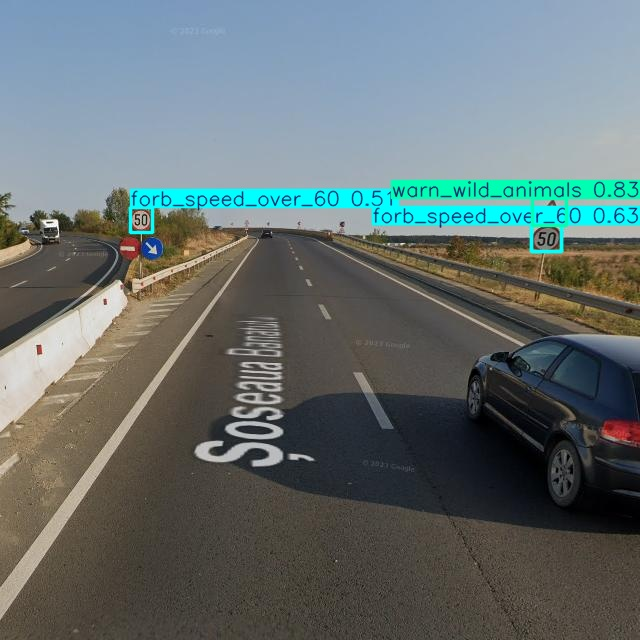

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Modeli Roboflow'a deploy edelim

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/traffic-sign-project-qkdyy/traffic-signs-detection-europe-rps2t/2
Share your model with the world at: https://universe.roboflow.com/traffic-sign-project-qkdyy/traffic-signs-detection-europe-rps2t/model/2
